In [ ]:
!pip install statsmodels


In [2]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error

In [3]:
df = pd.read_csv("train.csv")  # dataset file name
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [4]:
# Convert Date column
df['Date'] = pd.to_datetime(df['Date'])

# Sort by Date
df = df.sort_values('Date')

df.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
277665,29,5,2010-02-05,15552.08,False
277808,29,6,2010-02-05,3200.22,False
277951,29,7,2010-02-05,10820.05,False
278094,29,8,2010-02-05,20055.64,False


In [5]:
#Aggregate sales by month/week using groupby.
weekly_sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()

weekly_sales.head()


,Date,Weekly_Sales
0,2010-02-05,49750740.50
1,2010-02-12,48336677.63
2,2010-02-19,48276993.78
3,2010-02-26,43968571.13
4,2010-03-05,46871470.30


In [6]:
#Train Test Split
train_size = int(len(weekly_sales) * 0.8)

train = weekly_sales[:train_size]
test = weekly_sales[train_size:]


In [7]:
#Applimg Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(
    train['Weekly_Sales'],
    trend='add',
    seasonal='add',
    seasonal_periods=52
)

model_fit = model.fit()

forecast = model_fit.forecast(len(test))


In [8]:
#evalute model
from sklearn.metrics import mean_absolute_error


mae = mean_absolute_error(test['Weekly_Sales'], forecast)

mape = np.mean(np.abs((test['Weekly_Sales'] - forecast) / test['Weekly_Sales'])) * 100

print("MAE:", mae)
print("MAPE:", mape)


MAE: 1824922.987780064
MAPE: 3.9407741270743815


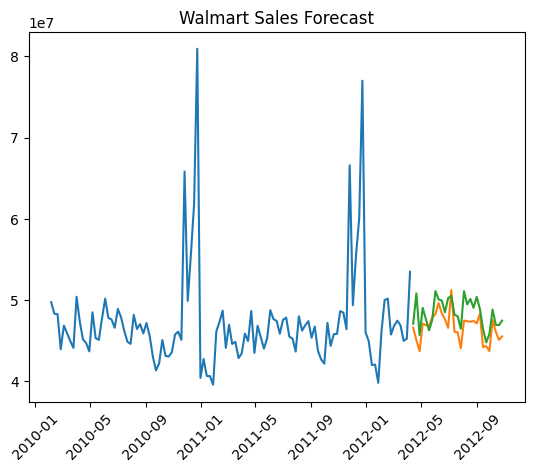

In [9]:
#plot Forecast

plt.figure()
plt.plot(train['Date'], train['Weekly_Sales'])
plt.plot(test['Date'], test['Weekly_Sales'])
plt.plot(test['Date'], forecast)
plt.title("Walmart Sales Forecast")
plt.xticks(rotation=45)
plt.show()


In [10]:
forecast_df = pd.DataFrame({
    "Date": test['Date'],
    "Actual_Sales": test['Weekly_Sales'],
    "Forecast_Sales": forecast
})

forecast_df.to_csv("forecast_output.csv", index=False)
